In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-09-03 00:48:37.387970: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-03 00:48:37.389649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-03 00:48:37.422844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-03 00:48:37.423819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 00:48:37.994959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
min_sequence_length = df['canonical_smiles'].apply(len).min()
max_sequence_length = df['canonical_smiles'].apply(len).max()

In [7]:
max_sequence_length

204

In [8]:
X = df['canonical_smiles']
y = df['pIC50']

In [9]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract canonical smiles from the DataFrame and labels
canonical_smiles = X.tolist()
labels = y.tolist()

# Initialize the Tokenizer
tokenizer = Tokenizer(char_level=True)

# Fit the tokenizer on the canonical smiles
tokenizer.fit_on_texts(canonical_smiles)

# Tokenize and pad the canonical smiles sequences
canonical_smiles_tokenized = tokenizer.texts_to_sequences(canonical_smiles)
max_sequence_length = max(map(len, canonical_smiles_tokenized))
canonical_smiles_padded = pad_sequences(canonical_smiles_tokenized, 
                                        maxlen=max_sequence_length)

# Convert labels to a numpy array
labels_array = np.array(labels)

# Convert padded sequences to a numpy array
X_seq_pad = np.array(canonical_smiles_padded)

In [11]:
X_seq_pad.shape[1]

204

In [12]:
# # Find rows with inf values
# rows_with_inf = np.any(np.isinf(X_seq_pad), axis=1)

# # Remove rows with inf values
# X_seq_pad = X_seq_pad[~rows_with_inf]

# X_seq_pad.shape



In [13]:
X_seq_pad[200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 1, 4, 1, 7, 1, 2, 6, 1, 9, 1, 4, 1, 1, 1, 1, 9,
       3, 1, 1, 1, 1, 7], dtype=int32)

# Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Convert labels to a numpy array
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, labels_array, test_size=0.2, random_state=999)
X_train = np.delete(X_train,slice(4100,4150),axis=0)
y_train = np.delete(y_train,slice(4100,4150),axis=0)

In [16]:
len(X_train), len(y_train), len(X_test) , len(y_test)

(4875, 4875, 1232, 1232)

# Network Model

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [18]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [19]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(list(tokenizer.word_index.keys()))

In [20]:
max_sequence_len = len(max(X_seq_pad, key=len))

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, BatchNormalization, Activation, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Build the sequential model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=X_seq_pad.shape[1]))

# Bidirectional LSTM layer with L2 regularization
model.add(Bidirectional(LSTM(100, return_sequences=False, kernel_regularizer=l2(0.01))))

# Dense layer with L2 regularization
model.add(Dense(125, kernel_regularizer=l2(0.01)))

# Batch normalization layer
model.add(BatchNormalization())

# Activation layer
model.add(Activation('relu'))

# Output dense layer
model.add(Dense(1))

# Print the model summary
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001, clipvalue=0.1), loss='mse', metrics=[R2])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 204, 256)          8704      
                                                                 
 bidirectional (Bidirection  (None, 200)               285600    
 al)                                                             
                                                                 
 dense (Dense)               (None, 125)               25125     
                                                                 
 batch_normalization (Batch  (None, 125)               500       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [22]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [23]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping,mcp])

Epoch 1/150
153/153 [==============================] - ETA: 0s - loss: 9.5636 - R2: -2.1552INFO:tensorflow:Assets written to: models/best_model_1/assets


INFO:tensorflow:Assets written to: models/best_model_1/assets


153/153 [==============================] - 30s 177ms/step - loss: 9.5636 - R2: -2.1552 - val_loss: 9.6102 - val_R2: -2.5207 - lr: 0.0010
Epoch 2/150
153/153 [==============================] - ETA: 0s - loss: 3.9159 - R2: -0.2573INFO:tensorflow:Assets written to: models/best_model_2/assets


INFO:tensorflow:Assets written to: models/best_model_2/assets


153/153 [==============================] - 26s 171ms/step - loss: 3.9159 - R2: -0.2573 - val_loss: 7.3173 - val_R2: -1.7550 - lr: 0.0010
Epoch 3/150
153/153 [==============================] - ETA: 0s - loss: 3.2710 - R2: -0.1750INFO:tensorflow:Assets written to: models/best_model_3/assets


INFO:tensorflow:Assets written to: models/best_model_3/assets


153/153 [==============================] - 23s 154ms/step - loss: 3.2710 - R2: -0.1750 - val_loss: 4.6045 - val_R2: -0.6669 - lr: 0.0010
Epoch 4/150
153/153 [==============================] - ETA: 0s - loss: 2.9073 - R2: -0.0560INFO:tensorflow:Assets written to: models/best_model_4/assets


INFO:tensorflow:Assets written to: models/best_model_4/assets


153/153 [==============================] - 28s 182ms/step - loss: 2.9073 - R2: -0.0560 - val_loss: 3.0767 - val_R2: -0.0723 - lr: 0.0010
Epoch 5/150
153/153 [==============================] - ETA: 0s - loss: 2.7232 - R2: -0.0415INFO:tensorflow:Assets written to: models/best_model_5/assets


INFO:tensorflow:Assets written to: models/best_model_5/assets


153/153 [==============================] - 32s 206ms/step - loss: 2.7232 - R2: -0.0415 - val_loss: 2.3991 - val_R2: 0.1545 - lr: 0.0010
Epoch 6/150
153/153 [==============================] - ETA: 0s - loss: 2.5208 - R2: 0.0304INFO:tensorflow:Assets written to: models/best_model_6/assets


INFO:tensorflow:Assets written to: models/best_model_6/assets


153/153 [==============================] - 43s 278ms/step - loss: 2.5208 - R2: 0.0304 - val_loss: 2.3602 - val_R2: 0.1378 - lr: 0.0010
Epoch 7/150
153/153 [==============================] - 29s 191ms/step - loss: 2.4701 - R2: -0.0051 - val_loss: 3.0381 - val_R2: -0.1451 - lr: 0.0010
Epoch 8/150
153/153 [==============================] - 29s 192ms/step - loss: 2.3983 - R2: 0.0402 - val_loss: 2.4575 - val_R2: 0.0840 - lr: 0.0010
Epoch 9/150
153/153 [==============================] - 31s 202ms/step - loss: 2.2605 - R2: 0.0969 - val_loss: 2.8764 - val_R2: -0.0832 - lr: 0.0010
Epoch 10/150
153/153 [==============================] - ETA: 0s - loss: 2.2565 - R2: 0.0868INFO:tensorflow:Assets written to: models/best_model_10/assets


INFO:tensorflow:Assets written to: models/best_model_10/assets


153/153 [==============================] - 31s 201ms/step - loss: 2.2565 - R2: 0.0868 - val_loss: 2.0830 - val_R2: 0.2247 - lr: 0.0010
Epoch 11/150
153/153 [==============================] - 25s 161ms/step - loss: 2.1139 - R2: 0.1544 - val_loss: 2.6842 - val_R2: -0.0252 - lr: 0.0010
Epoch 12/150
153/153 [==============================] - 24s 156ms/step - loss: 2.1133 - R2: 0.1550 - val_loss: 2.2763 - val_R2: 0.1465 - lr: 0.0010
Epoch 13/150
153/153 [==============================] - 25s 166ms/step - loss: 2.0139 - R2: 0.1896 - val_loss: 2.3115 - val_R2: 0.0954 - lr: 0.0010
Epoch 14/150
153/153 [==============================] - ETA: 0s - loss: 2.0073 - R2: 0.1860INFO:tensorflow:Assets written to: models/best_model_14/assets


INFO:tensorflow:Assets written to: models/best_model_14/assets


153/153 [==============================] - 32s 210ms/step - loss: 2.0073 - R2: 0.1860 - val_loss: 2.0440 - val_R2: 0.2303 - lr: 0.0010
Epoch 15/150
153/153 [==============================] - 24s 160ms/step - loss: 1.9559 - R2: 0.1999 - val_loss: 2.2932 - val_R2: 0.1080 - lr: 0.0010
Epoch 16/150
153/153 [==============================] - 26s 170ms/step - loss: 1.9205 - R2: 0.2225 - val_loss: 2.2111 - val_R2: 0.1472 - lr: 0.0010
Epoch 17/150
153/153 [==============================] - 27s 175ms/step - loss: 1.9139 - R2: 0.2258 - val_loss: 2.1455 - val_R2: 0.1776 - lr: 0.0010
Epoch 18/150
153/153 [==============================] - 26s 172ms/step - loss: 1.8650 - R2: 0.2444 - val_loss: 2.0945 - val_R2: 0.1907 - lr: 0.0010
Epoch 19/150
153/153 [==============================] - 24s 159ms/step - loss: 1.8291 - R2: 0.2503 - val_loss: 2.4928 - val_R2: 0.0333 - lr: 0.0010
Epoch 20/150
153/153 [==============================] - ETA: 0s - loss: 1.6360 - R2: 0.3527INFO:tensorflow:Assets written to:

INFO:tensorflow:Assets written to: models/best_model_20/assets


153/153 [==============================] - 34s 219ms/step - loss: 1.6360 - R2: 0.3527 - val_loss: 1.8872 - val_R2: 0.2670 - lr: 5.0000e-04
Epoch 21/150
153/153 [==============================] - ETA: 0s - loss: 1.5940 - R2: 0.3630INFO:tensorflow:Assets written to: models/best_model_21/assets


INFO:tensorflow:Assets written to: models/best_model_21/assets


153/153 [==============================] - 32s 212ms/step - loss: 1.5940 - R2: 0.3630 - val_loss: 1.7540 - val_R2: 0.3377 - lr: 5.0000e-04
Epoch 22/150
153/153 [==============================] - 25s 162ms/step - loss: 1.5349 - R2: 0.3855 - val_loss: 1.7971 - val_R2: 0.3079 - lr: 5.0000e-04
Epoch 23/150
153/153 [==============================] - 25s 164ms/step - loss: 1.5688 - R2: 0.3567 - val_loss: 1.7855 - val_R2: 0.3223 - lr: 5.0000e-04
Epoch 24/150
153/153 [==============================] - ETA: 0s - loss: 1.5256 - R2: 0.3781INFO:tensorflow:Assets written to: models/best_model_24/assets


INFO:tensorflow:Assets written to: models/best_model_24/assets


153/153 [==============================] - 30s 199ms/step - loss: 1.5256 - R2: 0.3781 - val_loss: 1.7376 - val_R2: 0.3300 - lr: 5.0000e-04
Epoch 25/150
153/153 [==============================] - ETA: 0s - loss: 1.4900 - R2: 0.3952INFO:tensorflow:Assets written to: models/best_model_25/assets


INFO:tensorflow:Assets written to: models/best_model_25/assets


153/153 [==============================] - 30s 196ms/step - loss: 1.4900 - R2: 0.3952 - val_loss: 1.6142 - val_R2: 0.3868 - lr: 5.0000e-04
Epoch 26/150
153/153 [==============================] - 24s 160ms/step - loss: 1.4872 - R2: 0.3919 - val_loss: 1.8515 - val_R2: 0.2879 - lr: 5.0000e-04
Epoch 27/150
153/153 [==============================] - 26s 171ms/step - loss: 1.4303 - R2: 0.4254 - val_loss: 1.6319 - val_R2: 0.3818 - lr: 5.0000e-04
Epoch 28/150
153/153 [==============================] - 26s 170ms/step - loss: 1.4107 - R2: 0.4325 - val_loss: 1.7245 - val_R2: 0.3448 - lr: 5.0000e-04
Epoch 29/150
153/153 [==============================] - 24s 155ms/step - loss: 1.3867 - R2: 0.4462 - val_loss: 1.6499 - val_R2: 0.3730 - lr: 5.0000e-04
Epoch 30/150
153/153 [==============================] - ETA: 0s - loss: 1.3574 - R2: 0.4541INFO:tensorflow:Assets written to: models/best_model_30/assets


INFO:tensorflow:Assets written to: models/best_model_30/assets


153/153 [==============================] - 30s 194ms/step - loss: 1.3574 - R2: 0.4541 - val_loss: 1.5216 - val_R2: 0.4233 - lr: 5.0000e-04
Epoch 31/150
153/153 [==============================] - 24s 154ms/step - loss: 1.3604 - R2: 0.4470 - val_loss: 1.6801 - val_R2: 0.3662 - lr: 5.0000e-04
Epoch 32/150
153/153 [==============================] - 24s 155ms/step - loss: 1.3374 - R2: 0.4517 - val_loss: 1.5862 - val_R2: 0.3907 - lr: 5.0000e-04
Epoch 33/150
153/153 [==============================] - 24s 155ms/step - loss: 1.2839 - R2: 0.4837 - val_loss: 1.6397 - val_R2: 0.3651 - lr: 5.0000e-04
Epoch 34/150
153/153 [==============================] - 25s 163ms/step - loss: 1.2798 - R2: 0.4834 - val_loss: 1.5254 - val_R2: 0.4297 - lr: 5.0000e-04
Epoch 35/150
153/153 [==============================] - 25s 167ms/step - loss: 1.2776 - R2: 0.4842 - val_loss: 1.5277 - val_R2: 0.4172 - lr: 5.0000e-04
Epoch 36/150
153/153 [==============================] - ETA: 0s - loss: 1.1604 - R2: 0.5381INFO:tenso

INFO:tensorflow:Assets written to: models/best_model_36/assets


153/153 [==============================] - 32s 208ms/step - loss: 1.1604 - R2: 0.5381 - val_loss: 1.3982 - val_R2: 0.4627 - lr: 2.5000e-04
Epoch 37/150
153/153 [==============================] - 24s 155ms/step - loss: 1.1173 - R2: 0.5467 - val_loss: 1.4481 - val_R2: 0.4439 - lr: 2.5000e-04
Epoch 38/150
153/153 [==============================] - 24s 154ms/step - loss: 1.1244 - R2: 0.5376 - val_loss: 1.4092 - val_R2: 0.4688 - lr: 2.5000e-04
Epoch 39/150
153/153 [==============================] - 24s 157ms/step - loss: 1.0983 - R2: 0.5632 - val_loss: 1.4371 - val_R2: 0.4431 - lr: 2.5000e-04
Epoch 40/150
153/153 [==============================] - 24s 156ms/step - loss: 1.0779 - R2: 0.5631 - val_loss: 1.4299 - val_R2: 0.4576 - lr: 2.5000e-04
Epoch 41/150
153/153 [==============================] - 24s 154ms/step - loss: 1.0485 - R2: 0.5743 - val_loss: 1.4819 - val_R2: 0.4180 - lr: 2.5000e-04
Epoch 42/150
153/153 [==============================] - ETA: 0s - loss: 1.0081 - R2: 0.5948INFO:tenso

INFO:tensorflow:Assets written to: models/best_model_42/assets


153/153 [==============================] - 29s 189ms/step - loss: 1.0081 - R2: 0.5948 - val_loss: 1.3189 - val_R2: 0.4947 - lr: 1.2500e-04
Epoch 43/150
153/153 [==============================] - 24s 155ms/step - loss: 0.9903 - R2: 0.6007 - val_loss: 1.3346 - val_R2: 0.4895 - lr: 1.2500e-04
Epoch 44/150
153/153 [==============================] - ETA: 0s - loss: 0.9716 - R2: 0.6178INFO:tensorflow:Assets written to: models/best_model_44/assets


INFO:tensorflow:Assets written to: models/best_model_44/assets


153/153 [==============================] - 29s 189ms/step - loss: 0.9716 - R2: 0.6178 - val_loss: 1.2950 - val_R2: 0.5038 - lr: 1.2500e-04
Epoch 45/150
153/153 [==============================] - 24s 155ms/step - loss: 0.9657 - R2: 0.6072 - val_loss: 1.3139 - val_R2: 0.4940 - lr: 1.2500e-04
Epoch 46/150
153/153 [==============================] - 24s 155ms/step - loss: 0.9620 - R2: 0.6147 - val_loss: 1.3289 - val_R2: 0.4830 - lr: 1.2500e-04
Epoch 47/150
153/153 [==============================] - ETA: 0s - loss: 0.9704 - R2: 0.6075INFO:tensorflow:Assets written to: models/best_model_47/assets


INFO:tensorflow:Assets written to: models/best_model_47/assets


153/153 [==============================] - 30s 194ms/step - loss: 0.9704 - R2: 0.6075 - val_loss: 1.2930 - val_R2: 0.5013 - lr: 1.2500e-04
Epoch 48/150
153/153 [==============================] - 24s 159ms/step - loss: 0.9330 - R2: 0.6338 - val_loss: 1.3423 - val_R2: 0.4823 - lr: 1.2500e-04
Epoch 49/150
153/153 [==============================] - ETA: 0s - loss: 0.9199 - R2: 0.6313INFO:tensorflow:Assets written to: models/best_model_49/assets


INFO:tensorflow:Assets written to: models/best_model_49/assets


153/153 [==============================] - 30s 199ms/step - loss: 0.9199 - R2: 0.6313 - val_loss: 1.2838 - val_R2: 0.5029 - lr: 1.2500e-04
Epoch 50/150
153/153 [==============================] - 25s 161ms/step - loss: 0.9286 - R2: 0.6301 - val_loss: 1.3550 - val_R2: 0.4732 - lr: 1.2500e-04
Epoch 51/150
153/153 [==============================] - 25s 161ms/step - loss: 0.9228 - R2: 0.6277 - val_loss: 1.3178 - val_R2: 0.4914 - lr: 1.2500e-04
Epoch 52/150
153/153 [==============================] - ETA: 0s - loss: 0.9156 - R2: 0.6305INFO:tensorflow:Assets written to: models/best_model_52/assets


INFO:tensorflow:Assets written to: models/best_model_52/assets


153/153 [==============================] - 33s 216ms/step - loss: 0.9156 - R2: 0.6305 - val_loss: 1.2629 - val_R2: 0.5122 - lr: 1.2500e-04
Epoch 53/150
153/153 [==============================] - 24s 160ms/step - loss: 0.9146 - R2: 0.6331 - val_loss: 1.2694 - val_R2: 0.5106 - lr: 1.2500e-04
Epoch 54/150
153/153 [==============================] - 24s 154ms/step - loss: 0.8991 - R2: 0.6354 - val_loss: 1.3172 - val_R2: 0.4884 - lr: 1.2500e-04
Epoch 55/150
153/153 [==============================] - 24s 155ms/step - loss: 0.8849 - R2: 0.6495 - val_loss: 1.3346 - val_R2: 0.4820 - lr: 1.2500e-04
Epoch 56/150
153/153 [==============================] - 23s 154ms/step - loss: 0.8786 - R2: 0.6489 - val_loss: 1.3203 - val_R2: 0.4841 - lr: 1.2500e-04
Epoch 57/150
153/153 [==============================] - 24s 154ms/step - loss: 0.8647 - R2: 0.6583 - val_loss: 1.2672 - val_R2: 0.5094 - lr: 1.2500e-04
Epoch 58/150
153/153 [==============================] - 26s 167ms/step - loss: 0.8411 - R2: 0.6556 - 

INFO:tensorflow:Assets written to: models/best_model_59/assets


153/153 [==============================] - 30s 197ms/step - loss: 0.8417 - R2: 0.6599 - val_loss: 1.2601 - val_R2: 0.5129 - lr: 6.2500e-05
Epoch 60/150
153/153 [==============================] - ETA: 0s - loss: 0.8380 - R2: 0.6641INFO:tensorflow:Assets written to: models/best_model_60/assets


INFO:tensorflow:Assets written to: models/best_model_60/assets


153/153 [==============================] - 30s 197ms/step - loss: 0.8380 - R2: 0.6641 - val_loss: 1.2376 - val_R2: 0.5223 - lr: 6.2500e-05
Epoch 61/150
153/153 [==============================] - 24s 159ms/step - loss: 0.8359 - R2: 0.6636 - val_loss: 1.2621 - val_R2: 0.5126 - lr: 6.2500e-05
Epoch 62/150
153/153 [==============================] - 25s 167ms/step - loss: 0.8072 - R2: 0.6868 - val_loss: 1.2392 - val_R2: 0.5208 - lr: 6.2500e-05
Epoch 63/150
153/153 [==============================] - ETA: 0s - loss: 0.8085 - R2: 0.6832INFO:tensorflow:Assets written to: models/best_model_63/assets


INFO:tensorflow:Assets written to: models/best_model_63/assets


153/153 [==============================] - 31s 205ms/step - loss: 0.8085 - R2: 0.6832 - val_loss: 1.2370 - val_R2: 0.5214 - lr: 6.2500e-05
Epoch 64/150
153/153 [==============================] - 26s 171ms/step - loss: 0.8029 - R2: 0.6793 - val_loss: 1.2598 - val_R2: 0.5124 - lr: 6.2500e-05
Epoch 65/150
153/153 [==============================] - ETA: 0s - loss: 0.8231 - R2: 0.6738INFO:tensorflow:Assets written to: models/best_model_65/assets


INFO:tensorflow:Assets written to: models/best_model_65/assets


153/153 [==============================] - 33s 217ms/step - loss: 0.8231 - R2: 0.6738 - val_loss: 1.2331 - val_R2: 0.5220 - lr: 6.2500e-05
Epoch 66/150
153/153 [==============================] - 26s 169ms/step - loss: 0.8060 - R2: 0.6755 - val_loss: 1.2405 - val_R2: 0.5205 - lr: 6.2500e-05
Epoch 67/150
153/153 [==============================] - 25s 166ms/step - loss: 0.7799 - R2: 0.6963 - val_loss: 1.2407 - val_R2: 0.5214 - lr: 6.2500e-05
Epoch 68/150
153/153 [==============================] - ETA: 0s - loss: 0.8025 - R2: 0.6814INFO:tensorflow:Assets written to: models/best_model_68/assets


INFO:tensorflow:Assets written to: models/best_model_68/assets


153/153 [==============================] - 33s 213ms/step - loss: 0.8025 - R2: 0.6814 - val_loss: 1.2259 - val_R2: 0.5243 - lr: 6.2500e-05
Epoch 69/150
153/153 [==============================] - 25s 164ms/step - loss: 0.7874 - R2: 0.6870 - val_loss: 1.2506 - val_R2: 0.5150 - lr: 6.2500e-05
Epoch 70/150
153/153 [==============================] - 25s 166ms/step - loss: 0.7872 - R2: 0.6810 - val_loss: 1.2331 - val_R2: 0.5231 - lr: 6.2500e-05
Epoch 71/150
153/153 [==============================] - 27s 175ms/step - loss: 0.7915 - R2: 0.6886 - val_loss: 1.2272 - val_R2: 0.5263 - lr: 6.2500e-05
Epoch 72/150
153/153 [==============================] - 25s 166ms/step - loss: 0.7907 - R2: 0.6773 - val_loss: 1.2328 - val_R2: 0.5250 - lr: 6.2500e-05
Epoch 73/150
153/153 [==============================] - ETA: 0s - loss: 0.7895 - R2: 0.6836INFO:tensorflow:Assets written to: models/best_model_73/assets


INFO:tensorflow:Assets written to: models/best_model_73/assets


153/153 [==============================] - 32s 208ms/step - loss: 0.7895 - R2: 0.6836 - val_loss: 1.2201 - val_R2: 0.5276 - lr: 6.2500e-05
Epoch 74/150
153/153 [==============================] - 25s 164ms/step - loss: 0.7818 - R2: 0.6848 - val_loss: 1.2431 - val_R2: 0.5184 - lr: 6.2500e-05
Epoch 75/150
153/153 [==============================] - 27s 176ms/step - loss: 0.7595 - R2: 0.6923 - val_loss: 1.2314 - val_R2: 0.5253 - lr: 6.2500e-05
Epoch 76/150
153/153 [==============================] - 27s 175ms/step - loss: 0.7940 - R2: 0.6798 - val_loss: 1.2501 - val_R2: 0.5148 - lr: 6.2500e-05
Epoch 77/150
153/153 [==============================] - 27s 174ms/step - loss: 0.7660 - R2: 0.6978 - val_loss: 1.2564 - val_R2: 0.5129 - lr: 6.2500e-05
Epoch 78/150
153/153 [==============================] - 25s 166ms/step - loss: 0.7650 - R2: 0.6893 - val_loss: 1.2423 - val_R2: 0.5205 - lr: 6.2500e-05
Epoch 79/150
153/153 [==============================] - 25s 164ms/step - loss: 0.7549 - R2: 0.6963 - 

INFO:tensorflow:Assets written to: models/best_model_84/assets


153/153 [==============================] - 31s 205ms/step - loss: 0.7232 - R2: 0.7147 - val_loss: 1.2183 - val_R2: 0.5281 - lr: 1.5625e-05
Epoch 85/150
153/153 [==============================] - 25s 162ms/step - loss: 0.7249 - R2: 0.7161 - val_loss: 1.2250 - val_R2: 0.5275 - lr: 1.5625e-05
Epoch 86/150
153/153 [==============================] - 25s 163ms/step - loss: 0.7160 - R2: 0.7199 - val_loss: 1.2192 - val_R2: 0.5293 - lr: 1.5625e-05
Epoch 87/150
153/153 [==============================] - 26s 169ms/step - loss: 0.7220 - R2: 0.7121 - val_loss: 1.2316 - val_R2: 0.5237 - lr: 1.5625e-05
Epoch 88/150
153/153 [==============================] - 26s 170ms/step - loss: 0.7182 - R2: 0.7187 - val_loss: 1.2222 - val_R2: 0.5266 - lr: 1.5625e-05
Epoch 89/150
153/153 [==============================] - 28s 182ms/step - loss: 0.7112 - R2: 0.7239 - val_loss: 1.2239 - val_R2: 0.5265 - lr: 1.5625e-05
Epoch 90/150
153/153 [==============================] - 26s 170ms/step - loss: 0.7233 - R2: 0.7172 - 

In [33]:
y_pred = model.predict(X_test)

39/39 [==============================] - 1s 36ms/step


# Score

In [34]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [35]:
r2
# 0.4984533246797399

0.5668861015027289

In [36]:
model.save('models/final_v3.h5', )

/home/nando/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model (solo si se grabo el modelo)

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model_loaded = load_model('models/final_v3.h5', custom_objects={'R2': R2})

In [47]:
y_pred = model_loaded.predict(X_test)

39/39 [==============================] - 2s 37ms/step


¿Hasta que valores de r2 logró?

In [48]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.5668861015027289

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

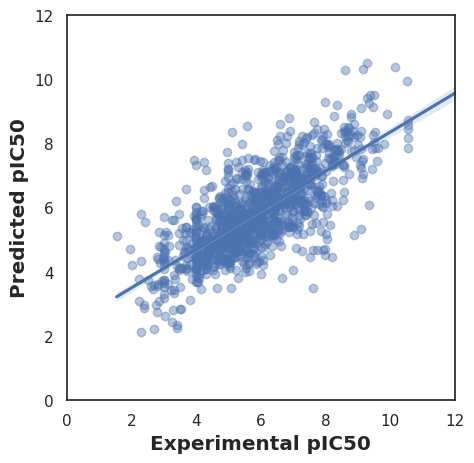

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show